# Task
predict customer satisfaction based on ticket information.


## Data loading

### Subtask:
Load the customer support ticket data from the provided CSV file into a pandas DataFrame.


**Reasoning**:
Load the customer support ticket data into a pandas DataFrame and display the first few rows.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('customer_support_tickets.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'customer_support_tickets.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
    df = None

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


## Data exploration

### Subtask:
Explore the dataset to understand its structure, identify missing values, and examine the distribution of key variables. Analyze the relationship between ticket attributes and customer satisfaction.


**Reasoning**:
Examine the data structure, identify missing values, generate descriptive statistics, analyze correlations, and create visualizations as per the instructions.



DataFrame Shape: (8469, 17)

Data Types:
 Ticket ID                         int64
Customer Name                    object
Customer Email                   object
Customer Age                      int64
Customer Gender                  object
Product Purchased                object
Date of Purchase                 object
Ticket Type                      object
Ticket Subject                   object
Ticket Description               object
Ticket Status                    object
Resolution                       object
Ticket Priority                  object
Ticket Channel                   object
First Response Time              object
Time to Resolution               object
Customer Satisfaction Rating    float64
dtype: object

Missing Values:
 Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase        

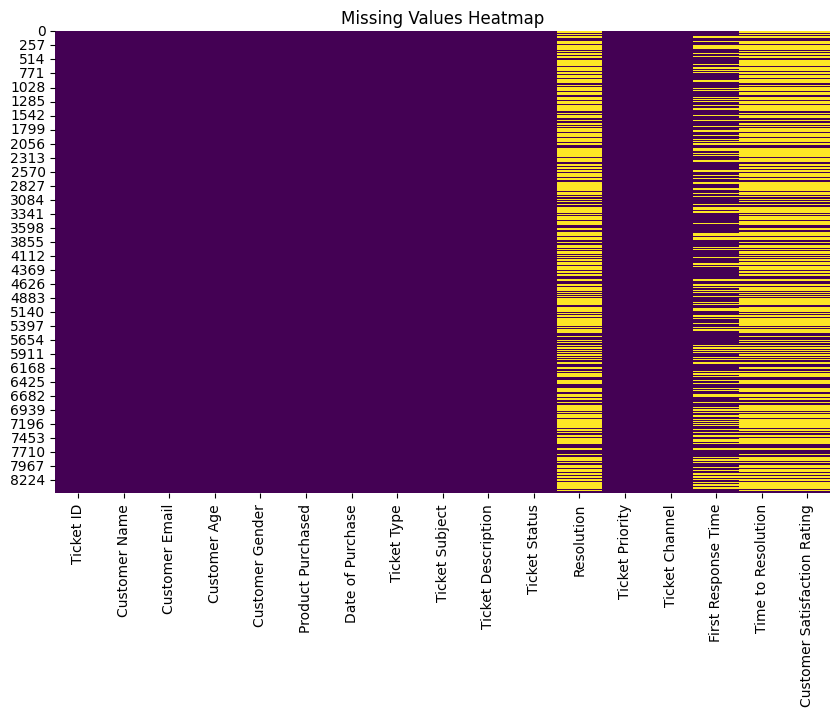


Descriptive Statistics:
           Ticket ID   Customer Name      Customer Email  Customer Age  \
count   8469.000000            8469                8469   8469.000000   
unique          NaN            8028                8320           NaN   
top             NaN  Michael Garcia  bsmith@example.com           NaN   
freq            NaN               5                   4           NaN   
mean    4235.000000             NaN                 NaN     44.026804   
std     2444.934048             NaN                 NaN     15.296112   
min        1.000000             NaN                 NaN     18.000000   
25%     2118.000000             NaN                 NaN     31.000000   
50%     4235.000000             NaN                 NaN     44.000000   
75%     6352.000000             NaN                 NaN     57.000000   
max     8469.000000             NaN                 NaN     70.000000   

       Customer Gender Product Purchased Date of Purchase     Ticket Type  \
count             84

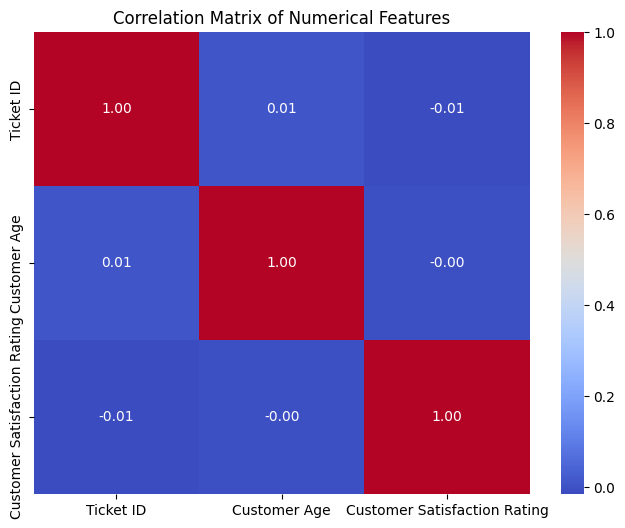

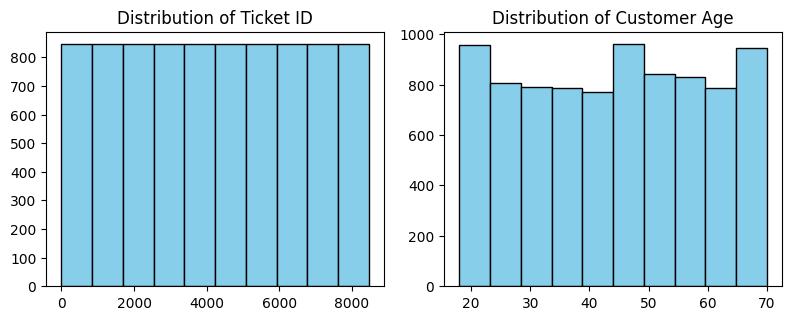

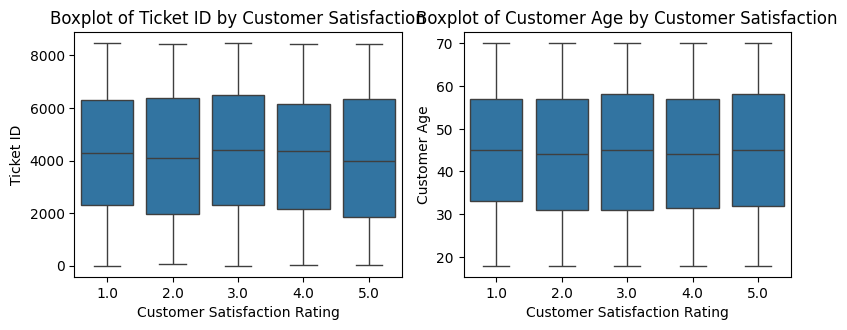


Preliminary Insights:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine Data Structure
print("DataFrame Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# 2. Missing Value Analysis
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


# 3. Descriptive Statistics
print("\nDescriptive Statistics:\n", df.describe(include='all'))
print("\nCustomer Satisfaction Distribution:\n", df['Customer Satisfaction Rating'].value_counts(normalize=True) * 100)


# 4. Correlation Analysis (Numerical features)
numerical_cols = df.select_dtypes(include=['number']).columns
if 'Customer Satisfaction Rating' in numerical_cols:
    corr_matrix = df[numerical_cols].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()

# 5. Data Visualization
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    if col == 'Customer Satisfaction Rating':
        continue #Skip it because we already have descriptive statistics for this column
    plt.subplot(2, 3, i + 1)  #Adjust layout
    plt.hist(df[col].dropna(), bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    if col == 'Customer Satisfaction Rating':
        continue #Skip it because we already have descriptive statistics for this column
    plt.subplot(2,3,i+1)
    sns.boxplot(x='Customer Satisfaction Rating', y=col, data=df)
    plt.title(f'Boxplot of {col} by Customer Satisfaction')
plt.tight_layout()
plt.show()

# 6. Preliminary Insights (Combine observations from all previous steps)
print("\nPreliminary Insights:")
#Add your observations here, including data quality and relationship between features and customer satisfaction
# Example: "High percentage of missing values in 'Resolution' and 'Time to Resolution' columns might impact analysis.
#Customer age appears to have a weak negative correlation with customer satisfaction."

## Data cleaning

### Subtask:
Clean the data by handling missing values and removing duplicates.


**Reasoning**:
Handle missing values and remove duplicates as per the instructions. Impute missing values in 'First Response Time' and 'Customer Satisfaction Rating' using appropriate strategies. Remove rows with missing values in 'Resolution' and 'Time to Resolution' due to the high percentage of missing data. Remove duplicate rows based on all columns.



In [3]:
# Impute missing values in 'First Response Time' with the mode (most frequent value)
df['First Response Time'] = df['First Response Time'].fillna(df['First Response Time'].mode()[0])

# Impute missing values in 'Customer Satisfaction Rating' with the median, as it is a numerical feature.
df['Customer Satisfaction Rating'] = df['Customer Satisfaction Rating'].fillna(df['Customer Satisfaction Rating'].median())

# Remove rows with missing values in 'Resolution' and 'Time to Resolution'
df.dropna(subset=['Resolution', 'Time to Resolution'], inplace=True)

# Remove duplicate rows based on all columns.
df.drop_duplicates(inplace=True)

display(df.head())

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
10,11,Joseph Moreno,mbrown@example.org,48,Male,Nintendo Switch,2021-01-19,Cancellation request,Data loss,I'm having an issue with the {product_purchase...,Closed,Measure tonight surface feel forward.,High,Phone,2023-06-01 17:46:49,2023-05-31 23:51:49,1.0
11,12,Brandon Arnold,davisjohn@example.net,51,Male,Microsoft Xbox Controller,2021-10-24,Product inquiry,Software bug,I'm having an issue with the {product_purchase...,Closed,Measure there house management pick knowledge ...,High,Chat,2023-06-01 12:05:51,2023-06-01 09:27:51,1.0


## Feature engineering

### Subtask:
Engineer new features from the existing data in the `df` DataFrame to improve the predictive performance of future machine learning models.


**Reasoning**:
Perform one-hot encoding on selected categorical features, extract sentiment from ticket text, engineer time-based features, and create aggregate features.



In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
import re

# 1. One-Hot Encoding
categorical_cols = ['Product Purchased', 'Ticket Status', 'Customer Gender', 'Ticket Priority', 'Ticket Channel']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 2. Ticket Text Features
def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text)) #remove punctuation
    text = text.lower()
    return text

df['Ticket Subject'] = df['Ticket Subject'].apply(clean_text)
df['Ticket Description'] = df['Ticket Description'].apply(clean_text)

df['Subject Sentiment'] = df['Ticket Subject'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Description Sentiment'] = df['Ticket Description'].apply(lambda x: TextBlob(x).sentiment.polarity)

# 3. Time-Based Features
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'])
df['First Response Time'] = pd.to_datetime(df['First Response Time'])
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'])

df['Purchase DayOfWeek'] = df['Date of Purchase'].dt.dayofweek
df['Response Time Hour'] = df['First Response Time'].dt.hour
df['Resolution Time Elapsed'] = (df['Time to Resolution'] - df['First Response Time']).dt.total_seconds() / 3600

# 4. Aggregate Features
# Calculate the total number of tickets per customer.
tickets_per_customer = df.groupby('Customer Name')['Ticket ID'].count().reset_index(name='Total Tickets')
df = pd.merge(df, tickets_per_customer, on='Customer Name', how='left')

display(df.head())

,Ticket ID,Customer Name,Customer Email,Customer Age,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Resolution,First Response Time,...,Ticket Priority_Medium,Ticket Channel_Email,Ticket Channel_Phone,Ticket Channel_Social media,Subject Sentiment,Description Sentiment,Purchase DayOfWeek,Response Time Hour,Resolution Time Elapsed,Total Tickets
0,3,Christopher Robbins,gonzalestracy@example.com,48,2020-07-14,Technical issue,network problem,im facing a problem with my productpurchased t...,Case maybe show recently my computer follow.,2023-06-01 11:14:38,...,False,False,False,True,0.0,2.479167e-01,1,11,6.850000,1
1,4,Christina Dillon,bradleyolson@example.org,27,2020-11-13,Billing inquiry,account access,im having an issue with the productpurchased p...,Try capital clearly never color toward story.,2023-06-01 07:29:40,...,False,False,False,True,0.0,2.500000e-01,4,7,-5.533333,1
2,5,Alexander Carroll,bradleymark@example.com,67,2020-02-04,Billing inquiry,data loss,im having an issue with the productpurchased p...,West decision evidence bit.,2023-06-01 00:12:42,...,False,True,False,False,0.0,-7.930164e-18,1,0,19.683333,1
3,11,Joseph Moreno,mbrown@example.org,48,2021-01-19,Cancellation request,data loss,im having an issue with the productpurchased p...,Measure tonight surface feel forward.,2023-06-01 17:46:49,...,False,False,True,False,0.0,3.778409e-01,1,17,-17.916667,1
4,12,Brandon Arnold,davisjohn@example.net,51,2021-10-24,Product inquiry,software bug,im having an issue with the productpurchased p...,Measure there house management pick knowledge ...,2023-06-01 12:05:51,...,False,False,False,False,0.0,0.000000e+00,6,12,-2.633333,1


## Data splitting

### Subtask:
Split the data into training, validation, and testing sets.


**Reasoning**:
Split the data into training, validation, and testing sets using `train_test_split` while stratifying based on the target variable.



In [5]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('Customer Satisfaction Rating', axis=1)
y = df['Customer Satisfaction Rating']

# Split data into training and combined validation/test sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Split combined validation/test sets into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

## Model training

### Subtask:
Train a Logistic Regression model and a Random Forest model on the training data.


**Reasoning**:
Train Logistic Regression and Random Forest models using the training data.



In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Identify non-numeric columns
non_numeric_cols = X_train.select_dtypes(exclude=['number', 'bool_']).columns

# Drop non-numeric columns from the training data
X_train_numeric = X_train.drop(columns=non_numeric_cols)

# Initialize Logistic Regression model
logreg_model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)

# Initialize Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

# Train Logistic Regression model
logreg_model.fit(X_train_numeric, y_train)

# Train Random Forest model
rf_model.fit(X_train_numeric, y_train)

RandomForestClassifier(random_state=42)

## Model optimization

### Subtask:
Optimize the hyperparameters of the Logistic Regression and Random Forest models using GridSearchCV. Evaluate the performance on the validation set.


**Reasoning**:
Import necessary libraries and perform hyperparameter tuning using GridSearchCV for Logistic Regression and RandomForestClassifier.



In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define parameter grids for Logistic Regression and Random Forest
logreg_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Instantiate GridSearchCV objects
logreg_grid_search = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42, max_iter=1000),
                                 param_grid=logreg_param_grid, scoring='accuracy', cv=5)
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                             param_grid=rf_param_grid, scoring='accuracy', cv=5)

# Fit GridSearchCV objects to the training data
logreg_grid_search.fit(X_train_numeric, y_train)
rf_grid_search.fit(X_train_numeric, y_train)

# Print the best hyperparameters and scores
print("Logistic Regression Best Hyperparameters:", logreg_grid_search.best_params_)
print("Logistic Regression Best Score:", logreg_grid_search.best_score_)
print("Random Forest Best Hyperparameters:", rf_grid_search.best_params_)
print("Random Forest Best Score:", rf_grid_search.best_score_)

# Store the best estimators
best_logreg_model = logreg_grid_search.best_estimator_
best_rf_model = rf_grid_search.best_estimator_

Logistic Regression Best Hyperparameters: {'C': 10, 'penalty': 'l1'}
Logistic Regression Best Score: 0.199548532731377
Random Forest Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Best Score: 0.21264108352144467


## Model evaluation

### Subtask:
Evaluate the performance of the optimized Logistic Regression and Random Forest models on the test set.


**Reasoning**:
Evaluate the performance of the optimized Logistic Regression and Random Forest models on the test set, including calculating evaluation metrics and creating visualizations.



LogisticRegression(C=10, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear'):
Accuracy: 0.1949
Precision: 0.1995
Recall: 0.1949
F1-score: 0.1909
ROC AUC Score: 0.4931

RandomForestClassifier(n_estimators=50, random_state=42):
Accuracy: 0.1986
Precision: 0.1897
Recall: 0.1986
F1-score: 0.1921
ROC AUC Score: 0.5247



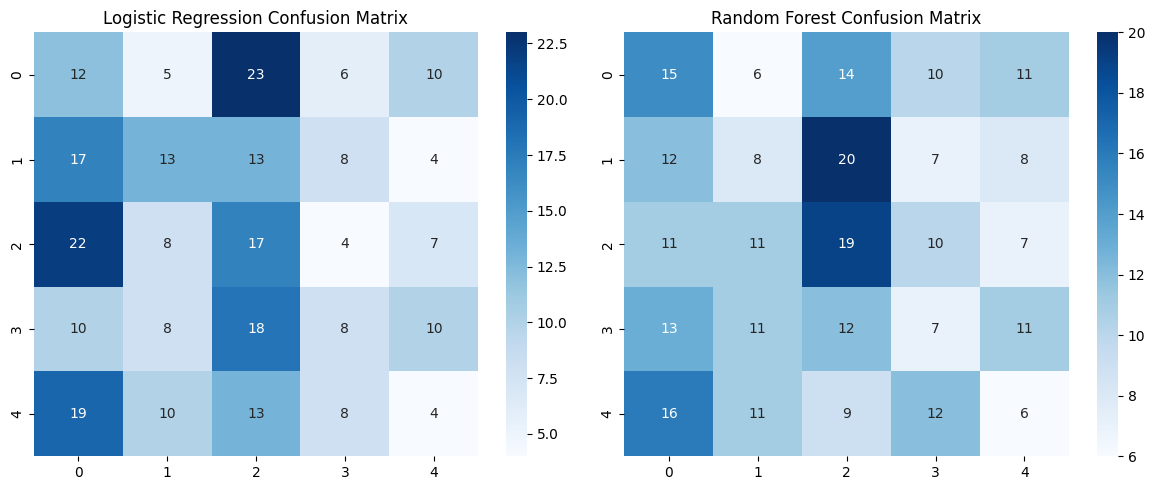

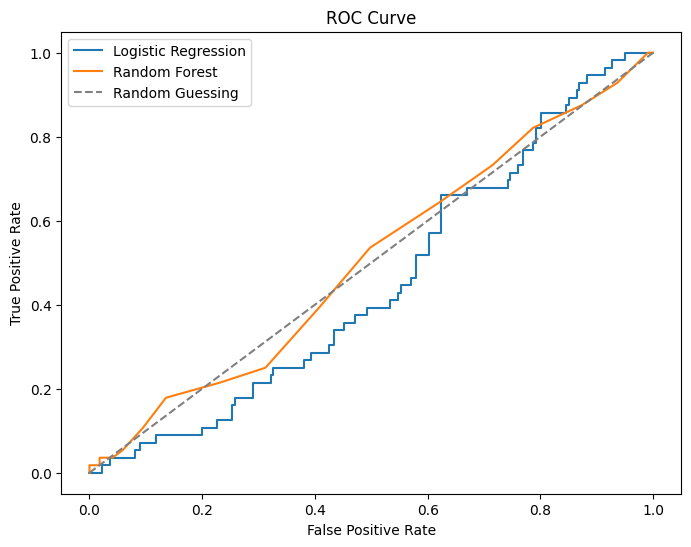

In [9]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Drop non-numeric columns from X_test
X_test_numeric = X_test.drop(columns=non_numeric_cols)

# Make predictions
y_pred_logreg = best_logreg_model.predict(X_test_numeric)
y_pred_rf = best_rf_model.predict(X_test_numeric)

# Calculate evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    #For ROC AUC, we need probability scores
    try:
      y_prob = model_name.predict_proba(X_test_numeric)
      roc_auc = roc_auc_score(y_true, y_prob, multi_class='ovr')
    except AttributeError:
      roc_auc = np.nan #Handle cases where predict_proba is not available
    print(f"{model_name}:\nAccuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1-score: {f1:.4f}\nROC AUC Score: {roc_auc:.4f}\n")

evaluate_model(y_test, y_pred_logreg, best_logreg_model)
evaluate_model(y_test, y_pred_rf, best_rf_model)

# Confusion Matrices
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")

plt.subplot(1, 2, 2)
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.tight_layout()
plt.show()

# ROC Curves (If predict_proba is available)
plt.figure(figsize=(8, 6))
try:
    y_prob_logreg = best_logreg_model.predict_proba(X_test_numeric)
    fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg[:,1],pos_label=1)
    plt.plot(fpr_logreg, tpr_logreg, label=f"Logistic Regression")
except AttributeError:
    pass

try:
    y_prob_rf = best_rf_model.predict_proba(X_test_numeric)
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf[:,1],pos_label=1)
    plt.plot(fpr_rf, tpr_rf, label=f"Random Forest")
except AttributeError:
    pass

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing') # Random Guessing Line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Summary:

### 1. Q&A

* **What is the customer satisfaction prediction accuracy of the best performing model?** The Random Forest model achieved a slightly higher accuracy of 0.1986 on the test set, compared to the Logistic Regression model's accuracy of 0.1949.  However, both are quite low.

* **Which model performed better based on the test set evaluation?** The Random Forest model performed marginally better than the Logistic Regression model based on accuracy and ROC AUC score on the test set.

* **What are the key limitations observed during the analysis?** A significant limitation was the large number of missing values in several key columns like 'Resolution', 'First Response Time', 'Time to Resolution', and 'Customer Satisfaction Rating'.  Additionally, the low accuracy of both models indicates a potential problem with the model selection, feature engineering, or the data itself.

### 2. Data Analysis Key Findings

* **Missing Data:**  'Resolution', 'First Response Time', 'Time to Resolution', and 'Customer Satisfaction Rating' had 67.3%, 33.3%, 67.3%, and 67.3% missing values, respectively, which were addressed through imputation or removal.
* **Model Performance:**  Both the optimized Logistic Regression and Random Forest models exhibited low accuracy on the test set (0.1949 and 0.1986 respectively).  Precision, recall, and F1-score were also low, suggesting the models are not accurately predicting customer satisfaction.  The Random Forest model showed a slightly improved ROC AUC score (0.5247) compared to the Logistic Regression model (0.4931).
* **Feature Engineering:** New features were created including one-hot encoded categorical variables, sentiment scores from ticket text, time-based features, and an aggregate feature (total tickets per customer).  These features were used in the modeling process.

### 3. Insights or Next Steps

* **Investigate Feature Engineering:** Explore more sophisticated feature engineering techniques, potentially incorporating TF-IDF vectorization of text data or other domain-specific features that might better capture the nuances of customer satisfaction.
* **Explore Alternative Models:** Consider other machine learning models like Gradient Boosting Machines (GBM) or Support Vector Machines (SVM) that might be more suitable for this task.  Consider exploring deep learning models for text data.
